<a href="https://colab.research.google.com/github/erwincarlogonzales/CodingDojo/blob/main/Simple_Neural_Network_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display = 'diagram')

# model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
# load file
filename = '/content/drive/MyDrive/Colab Notebooks/heart - heart.csv'
df = pd.read_csv(filename, index_col = 'Age')
df.head()

,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,,,,,,,,,,,
40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data cleaning

In [3]:
df.isna().sum()

Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(918, 11)

In [6]:
df.describe()

,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Preprocessing

In [7]:
# determine target y and features X
y = df['HeartDisease']
X = df.drop(columns = 'HeartDisease')
X.head()

,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
Age,,,,,,,,,,
40,M,ATA,140,289,0,Normal,172,N,0.0,Up
49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
37,M,ATA,130,283,0,ST,98,N,0.0,Up
48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [8]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [9]:
# instantitate column selector
cat_selector = make_column_selector(dtype_include = 'object')
num_selector = make_column_selector(dtype_include = 'number')

In [10]:
# instantiate encoders
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
scaler = StandardScaler()

In [11]:
# create pipelines
cat_pipe = make_pipeline(ohe, scaler)
num_pipe = make_pipeline(scaler)

In [12]:
# set tuples
cat_tuple = (cat_pipe, cat_selector)
num_tuple = (num_pipe, num_selector)

In [13]:
# instantitate the transformer
preprocessor = make_column_transformer(cat_tuple, num_tuple, remainder = 'passthrough')

In [14]:
preprocessor.fit(X_train, y_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd3f5b06590>),
                                ('pipeline-2',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd3f5b064d0>)])

In [15]:
# transform the processed data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Build the model

In [16]:
X_train_processed.shape

(688, 19)

In [17]:
# define NN structure
input_shape = X_train_processed.shape[1] # find the shape of the dataset and use [1] to select all and make it updatable
input_shape

19

In [18]:
# define model type
model = Sequential()

In [19]:
# add first layer
model.add(Dense(19, input_dim = input_shape, activation = 'relu'))

# add dropout
model.add(Dropout(.2))

# add second layer
model.add(Dense(10, input_dim = input_shape, activation = 'relu'))

# add dropout
model.add(Dropout(.2))

# add output layer
model.add(Dense(1, activation = 'sigmoid'))

In [20]:
# compile the model
model.compile(loss = 'bce', optimizer = 'adam')

In [21]:
# fit the model
history = model.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test),
                    epochs = 100)

Epoch 1/100
22/22 [==============================] - 1s 19ms/step - loss: 0.7856 - val_loss: 0.6740
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6732 - val_loss: 0.5968
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5857 - val_loss: 0.5530
Epoch 4/100
22/22 [==============================] - 0s 7ms/step - loss: 0.5379 - val_loss: 0.5163
Epoch 5/100
22/22 [==============================] - 0s 8ms/step - loss: 0.5176 - val_loss: 0.4874
Epoch 6/100
22/22 [==============================] - 0s 6ms/step - loss: 0.4914 - val_loss: 0.4605
Epoch 7/100
22/22 [==============================] - 0s 9ms/step - loss: 0.4676 - val_loss: 0.4377
Epoch 8/100
22/22 [==============================] - 0s 6ms/step - loss: 0.4540 - val_loss: 0.4169
Epoch 9/100
22/22 [==============================] - 0s 7ms/step - loss: 0.4515 - val_loss: 0.3989
Epoch 10/100
22/22 [==============================] - 0s 5ms/step - loss: 0.4210 - val_loss: 0.3849
Epoch 11

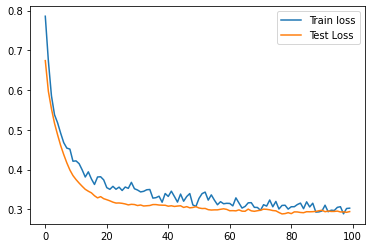

In [22]:
# Visualize the loss
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend();